# Inertia tensor | Cube

[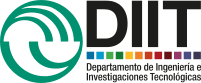](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Problem

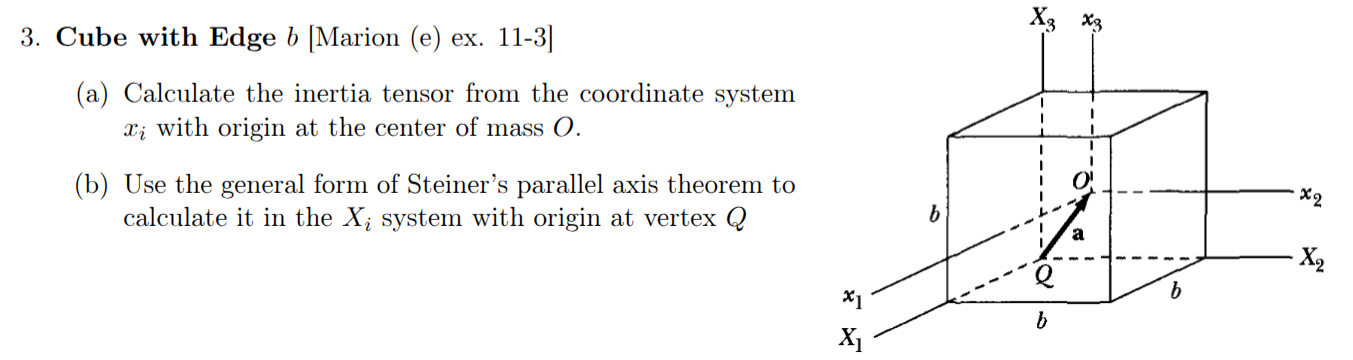

## Solution

> **Reference**  
> Chapter 11  
> Classical Dynamics of Particles and Systems  
> Stephen Thornton and Jerry B. Marion

### Inertia tensor from $O$
The problem asks for the inertia tensor. This includes every moment and product of inertia contained in the tensor.

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me 
me.init_vprinting() # dot notation for velocity and acceleration
import warnings
warnings.filterwarnings("ignore")

In [2]:
Ixx, Ixy, Ixz = sm.symbols('I_{xx} I_{xy} I_{xz}')
Iyx, Iyy, Iyz = sm.symbols('I_{yx} I_{yy} I_{yz}')
Izx, Izy, Izz = sm.symbols('I_{zx} I_{zy} I_{zz}')

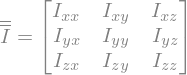

In [3]:
I = sm.Eq(
  sm.Symbol('\overline{\overline{I} }'),
  sm.Matrix([[Ixx, Ixy, Ixz], [Iyx, Iyy, Iyz], [Izx, Izy, Izz]]), 
  evaluate = False
  )
I

Lets recall the expression for each element in the inertia tensor of a continuous system:
$$
I_{ik} = \iiint \rho(\vec{r}) \left(x_l^2 \delta_{ik} -  x_i x_k \right) dV .
$$
We'll perform the calculations using cartesian coordinates, thus $dV = dx dy dz$. 
Density is $\rho = \frac{m}{b^3}$.

Let's start with one of the moments of inertia.
The first one corresponds to $i=x$ and $k=x$:
$$
\begin{aligned}
I_{xx} 
&= \iiint \rho(\vec{r}) \left(x^2 + y^2 + z^2 - xx \right) dV\\
&= \frac{m}{b^3} \int_{-b/2}^{b/2} dx \int_{-b/2}^{b/2} dy \int_{-b/2}^{b/2} dz ( y^2 + z^2 ).
\end{aligned}
$$

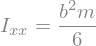

In [4]:
x, y, z, b, m = sm.symbols('x y z b m')
f_xx = y**2 + z**2
rho_density = m/ b**3
Ixx_exp = rho_density* sm.integrate(f_xx, (x, -b/2, b/2), (y, -b/2, b/2), (z,-b/2, b/2) )
sm.Eq( Ixx , Ixx_exp )

The moments of inertia $I_{yy}$ and $I_{zz}$ are equal to this expression.

In [5]:
Iyy_exp = Ixx_exp
Izz_exp = Ixx_exp

Next, the products of inertia with $i=x$.
The first one is the one with $k=y$:
$$
\begin{aligned}
I_{xy} 
&= \iiint \rho(\vec{r}) \left(- xy \right) dV\\
&= \frac{m}{b^3} \int_0^b dz \int_0^b dy \int_0^b dx ( -xy ).
\end{aligned}
$$

In [6]:
f_xy = -x* y
Ixy_exp = rho_density* sm.integrate(f_xy, (x, -b/2, b/2), (y, -b/2, b/2), (z, -b/2, b/2) )
sm.Eq( Ixy , Ixy_exp )

It's easy to prove that every other product of inertia are the same.

In [7]:
Ixz_exp = Ixy_exp
Iyx_exp = Ixy_exp
Iyz_exp = Ixy_exp
Izx_exp = Ixy_exp
Izy_exp = Ixy_exp

Therefor, the inertia tensor calculated from the center of mass $O$ with the axes directed as shown in the figure is

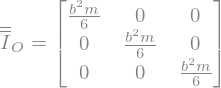

In [8]:
subsI = {
    Ixx: Ixx_exp,
    Ixy: Ixy_exp,
    Ixz: Ixz_exp,
    Iyx: Iyx_exp,
    Iyy: Iyy_exp,
    Iyz: Iyz_exp,
    Izx: Izx_exp,
    Izy: Izy_exp,
    Izz: Izz_exp
}
I_subs = sm.Eq(sm.Symbol('\overline{\overline{I} }_O'), I.rhs.subs(subsI), evaluate = False )
I_subs

### $\overline{\overline{I} }$ transferred to vertex $Q$ applying the Steiner's parallel axis theorem

If the origin of axes $x'_i$ is not at the center of mass:
$$
I'_{ik} = I_{ik} + m (a^2 \delta_{ik} - a_i a_k ) 
$$
where $\vec{a}$ is directed from the center of mass to this frame of reference. This expression is known as **Steiner's theorem**.

In this case, $\vec{a} = \vec{OQ} = -\frac{b}{2} \hat{x} + (-\frac{b}{2}) \hat{y} + (-\frac{b}{2}) \hat{z} = -\frac{b}{2} \left( \hat{x} + \hat{y} + \hat{z} \right)$, so in order to find $I'_{ik}$, we have to add $m (a^2 \delta_{ik} - a_i a_k )$ to the $I_{ik}$ calculated previously.

For the elements on the diagonal for which $i=k$, we have to calculate
$$
\vec{a}^2 = \frac{b^2}{4} \left( \hat{x} + \hat{y} + \hat{z} \right) \cdot \left( \hat{x} + \hat{y} + \hat{z} \right) = \frac{3 b^2}{4},
$$
and each $- a_i a_k$ is
$$
- a_i a_k = - \left(-\frac{b}{2} \right) \left( -\frac{b}{2} \right) = - \frac{b^2}{4}.
$$

Then, subtracting the Steiner tensor from the one obtained previously is
$$
m (a^2 \delta_{ik} - a_i a_k )
= m \frac{b^2}{4}
\begin{pmatrix}
3 -1 & -1 & -1 \\
-1 & 3 -1 & -1 \\
-1 & -1 & 3 -1 \\
\end{pmatrix}
= m \frac{b^2}{4}
\begin{pmatrix}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 \\
\end{pmatrix}
$$

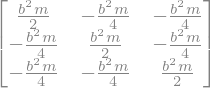

In [9]:
steiner = (m* b**2/ 4)* sm.Matrix(
  [
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
  ]
  )
steiner

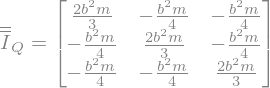

In [10]:
I_Q = sm.Eq(
  sm.Symbol('\overline{\overline{I} }_Q'),
  I_subs.rhs + steiner,
  evaluate = False
  )
I_Q